# Einzelnes Neuron

## Einleitung

Um den Einstieg zu erleichtern, schauen wir uns zunächst ein einzelnes Neuron genauer an.

**Lernziele:**

- verstehen was ein einzelnes Neuron macht
- Ein einzelnes Neuron in Python modellieren
- die Konzepte hinter Neuronalen Netzen besser verstehen

Ein einzelnes Neuron besitzt mehrere, gewichtete Eingänge und einen Ausgang siehe folgende Abbildung.


Weitere Informationen im Artikel,
[Neuronale Netze: Ein Blick in die Blackbox](https://www.informatik-aktuell.de/betrieb/kuenstliche-intelligenz/neuronale-netze-ein-blick-in-die-black-box.html).

:::{figure-md} markdown-fig
<img src="neuron.png" alt="pozi" class="bg-primary mb-1" width="600px">

Modell eines einzelnen Neurons.
:::

Die gewichteten Eingabewerte werden mit einem Bias verrechnet, vom Neuron aufsummiert und durch eine Aktivierungsfunktion wird ein Ausgabewert berechnet.

Wir beginnen zunächst mit dem einfachsten Fall:

## Ein vereinfachtes Neuron

In der Abbildung ist ein vereinfachtes künstliches Neuron zu sehen. Dieses Neuron besitzt keine Aktivierungsfunktion und keinen Bias-Term. Es besitzt lediglich eine Summierfunktion.

:::{figure-md} markdown-fig
<img src="neuron_summe.png" alt="pozi" class="bg-primary mb-1" width="600px">

Modell eines einzelnen Neurons ohne Bias und Aktivierungsfunktion.
:::

Die **Eingabedaten X** werden nun mit den **Gewichten w** verrechnet. Das Neuron bildet anschließend die Summe und gibt diese als **Ausgabewert y** aus. Wie die Werte für die Gewichte bestimmt werden kann man im **Kapitel: Lernvorgang** nachlesen. Für das weitere Vorgehen, reicht es aus, zu wissen, dass es diese Gewichte gibt.

Anhand dieses einfachen Neurons kann man den konzeptionellen Aufbau Neuronaler Netze besser verstehen. Was dieses Neuron kann, schauen wir uns anhand eines Beispiels in Python an.

## Lineare Regression ohne Bias

evt weglassen und nur mit Bias erklären

In [1]:
from IPython.display import IFrame

IFrame("https://www.geogebra.org/m/zg8duqnw",1000,1000)

[Linear Regression and Bias](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)

**Beispiel: Millimeter in Zoll umrechnen**

In [2]:
X = [
    [1],
    [15],
    [60]
]

y = [
    0.0393701,
    0.590551,
    2.3622
]

In [3]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

Das Modell hat nun den Zusammenhang der Trainingsdaten gelernt.
Das gelernte Gewicht entspricht dabei der Steigung der Regressionsgeraden.

In [4]:
# Steigung bzw Koeffizient oder Gewicht
print(model.coef_)

[0.03937]


Diesen gelernten Zusammenhang können wir nun auch auf neue Daten anwenden:

In [5]:
print(100 * 0.03937)

3.9370000000000003


Eine "Vorhersage" für eine Reihe an Werten bekommt man mit der predict-Methode:

In [6]:
model.predict([
    [120],
    [130]
])

array([4.72440047, 5.11810051])

Das einzelne Neuron ist bereits in der Lage den Zusammenhang zwischen Millimeter und Zoll aus den Trainingsdaten zu lernen.

## Lineare Regression mit Bias

**Beispiel: Grad Celsius in Fahrenheit umrechnen**

:::{figure-md} markdown-fig
<img src="neuron_bias.png" alt="pozi" class="bg-primary mb-1" width="600px">

Modell eines einzelnen Neurons mit Bias.
:::

In [7]:
X = [
    [-10],
    [0],
    [20]
]

y = [
    14,
    32,
    68
]

In [8]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = True)
model.fit(X, y)

LinearRegression()

Dadurch, dass wir dem Modell mit **fit_intercept = True** einen weiteren Freiheitsgrad zur Verfügung stellen, ist das Modell in der Lage den Zusammenhang zwischen Grad Celsius und Fahrenheit zu lernen. 

In [9]:
print(model.coef_)
print(model.intercept_)

[1.8]
32.0


Das Neuron hat den Zusammenhang korrekt gelernt. 

Die Berechnungsformel lautet:
**°F = °C * 1,8 + 32 (von Celsius nach Fahrenheit)**

**Beispiel: Verbrauch von Autos:**

Ein weiteres berühmtes Machinelearningbeispiel ist der [MPG Datensatz](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

**Verbrauch von Autos vorhersagen**

**Aufgabe:**

Eine Firma hat ein neues Auto angekündigt, aber noch keine Verbrauchsdaten angegeben. Kannst du den Verbrauch (in l/100km) des Autos schätzen, indem du ein Modell trainierst?

Das Auto hat:

- 8 Zylinder
- 200PS
- 2500kg

Lese dazu die Datei `mpg-dataset.csv` ein. Trainiere anschließend ein Modell, und sage den Verbrauch (in l/100km) dieses Autos vorher!

In [10]:
def mpg_to_l_per_100km(mpg):
    LITERS_PER_GALLON = 3.785411784
    KILOMETERS_PER_MILES = 1.609344

    return (100 * LITERS_PER_GALLON) / (KILOMETERS_PER_MILES * mpg)

print(mpg_to_l_per_100km(100))

2.352145833333333


In [11]:
import pandas as pd

df = pd.read_csv("mpg-dataset.csv")

In [12]:
X = df[["cylinders", "horsepower", "weight"]]

In [13]:
y = mpg_to_l_per_100km(df["mpg"])

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
print(model.coef_)
print(model.intercept_)

[0.2757425  0.03284566 0.00229432]
-0.523209321982586


In [16]:
print(model.predict([
    [8, 200, 2500]
]))

[13.98766161]


C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## Aktivierungsfunktion

**Wozu ist die Aktivierungsfunktion nötig?**

Die vereinfachten, linearen Neuronen lassen sich nicht hintereinander schalten/verknüpfen bzw macht es keinen Sinn dies zu tun. Eine Beispielrechnung verdeutlicht das:

**Beispiel:**
Am Eingang X liegt eine 5 an und am Ausgang soll eine 20 ausgegeben werden. Die beiden Gewichte bekommen 2 als Faktor. Das gleiche Ergebnis würde heraus kommen wenn man ein Neuron mit einem Gewicht und dem Faktor 4 verwendet.



:::{figure-md} markdown-fig
<img src="neuron_series.png" alt="sig" class="bg-primary mb-1" width="600px">

Lineare Neuronen in Reihe geschalten.


- "hintereinanderschalten" von vereinfachten, linearen Neuronen ohne Aktivierungsfunktion nicht möglich
- Bisher keine Ja/Nein Antworten oder Ausgabewerte zwischen 0 und 1 möglich

Die **Sigmoidfunktion** bildet die Ergebnisse auf den Zahlenbereich zwischen 0 und 1 ab. Die Ergebnisse können in der Form als eine Wahrscheinlichkeit aufgefasst werden:

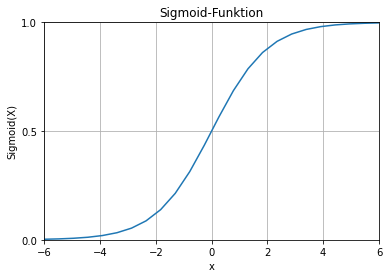

In [17]:
# Import matplotlib, numpy and math
import matplotlib.pyplot as plt
import numpy as np
import math
  
x = np.linspace(-6, 6, 24)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid(True)
plt.xlim([-6, 6])
plt.ylim([0, 1])
plt.yticks(np.arange(0, 1.1, 0.5))
plt.title('Sigmoid-Funktion')

plt.show()

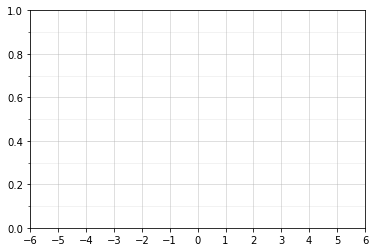

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(-6, 7, 1)
minor_ticks = np.arange(0, 1, 0.1)

ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
#ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()

## Logistische Regression

:::{figure-md} markdown-fig
<img src="neuron_activation.png" alt="pozi" class="bg-primary mb-1" width="600px">

Modell eines einzelnen Neurons mit Bias und Aktivierungsfunktion.
:::

**Beispiel: Wird ein Studierender die Prüfung bestehen?**

In [19]:
# X = Wie viele Stunden wurde gelernt?

X = [
    [50],
    [60],
    [70],
    [20],
    [10],
    [30],
]

y = [
    1, 
    1,
    1,
    0, 
    0, 
    0,
]

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 100000)
model.fit(X, y)

LogisticRegression(C=100000)

In [21]:
model.predict([
    [44]
])

array([1])

In [22]:
model.predict_proba([
    [35]
])

array([[0.99873289, 0.00126711]])